---

## ***Cellular Dynamics of HIV***

[Link to a relevant paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3399056/)
<br>(The equations are from [An introduction to Mathematical Biology](https://www.amazon.com/dp/0130352160))

At the end of 20th century, 50 million people had been infected by HIV and 15 million people had died from AIDS. Many mathematical models have been developed and used to determine the impact of the virus on the immune system and to test the responsiveness of the immune system to treatment.

HIV attacks certain white blood cells known as helper T cells (specifically, CD4+T cells), which are responsible for enhancing the production of antibodies by B cells. Here, we consider the interaction between three variables;

$x$: the number of uninfected CD4+T cells

$y$: the number of infected CD4+T cells

$v$: the number of free virus

  <center>$\displaystyle\frac{dx}{dt}= \gamma - d_x x - \beta xv$</center>
  <br>
  <center>$\displaystyle\frac{dy}{dt}= \beta xv - d_y y$</center>
  <br>
  <center>$\displaystyle\frac{dv}{dt}= ky - d_v v -\beta xv$</center>
  <br>
, where $x(0)>0$, $v(0)>0$, $y(0)=0$.


$\gamma$: a constant rate at which the immune system produces CD4+T cells

Uninfected CD4+T cells are infected at a rate of $\beta xv$, and, at the same rate, the free virus particles are lost (that is, they enter the cells).

$d_x$, $d_y$, $d_v$ are the death rate per capita.

$ky$: Each infected cell generates $N$ virus particles, where $N>>1$. We assume that all dying CD4+T cells generates virus particles. Therefore, $k=Nd_y$.

A healthy human adult has about 1 million CD4+T cells per milliliter of blood. Time unit is in days. (initial value)

Let's set $\gamma=10^5$ per day, $d_x=0.1$ per day, $d_y=0.5$ per day, $d_v=5$ per day, $\beta=2$x$10^-7$, $k=100$, $x(0)=10^6$, $y(0)=0$, $v(0)=1$

In [3]:
# Packages to import
import numpy as np
from scipy.integrate import solve_ivp

def T_HIV_model(t, z):
    #print(z)
    
    x, y, v = z
    
    gamma = 10**5
    dx = 0.1
    dy = 0.5
    dv = 5
    beta = 2*(10**(-7))
    k = 100
            
    dydt = [gamma - dx*x - beta*x*v,  beta*x*v - dy*y,  k*y - dv*v - beta*x*v]
    
    #if np.random.random()<0.0001:
    #    print(dydt)
    #    print(x,y,v,t)

    return dydt




Success? True
0 = The solver successfully reached the end of the integration interval.


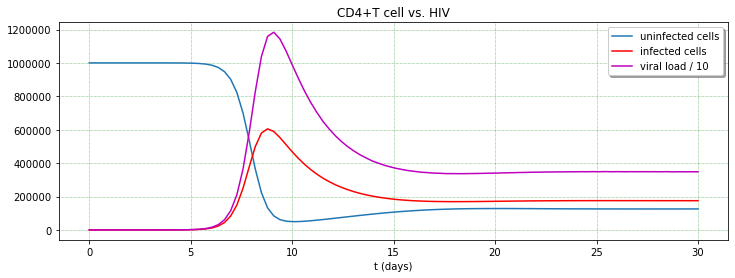

In [12]:
tspan = np.linspace(0,30,100)
zinit = [10**6, 0, 1]
sol = solve_ivp(T_HIV_model, (tspan[0], tspan[-1]), zinit, t_eval = tspan, dense_output=True)

print('Success?', sol.success)
print(sol.status, '=', sol.message)


import matplotlib.pyplot as plt
plt.figure(1, figsize=(12,4))

plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r')
plt.plot(sol.t, sol.y[2]/10,'m')
plt.legend(['uninfected cells', 'infected cells', 'viral load / 10'], shadow=True)
plt.xlabel('t (days)')
plt.title("CD4+T cell vs. HIV")
plt.grid(color='g', linestyle=':', linewidth=0.5)


#plt.ion()
plt.show()
